<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>




# 서울시 인구 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/people2.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [52]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
# matplotlib.font_manager._rebuild()
# plt.rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 pop01, pop02, pop03 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 단축 경로1: 'https://bit.ly/PopH01File'
- 단축 경로2: 'https://bit.ly/PopH02File'
- 단축 경로3: 'https://bit.ly/PopH03File'

In [58]:
# pop01 데이터 읽어오기

path1 = 'https://bit.ly/PopH01File'
path2 = 'https://bit.ly/PopH02File'
path3 = 'https://bit.ly/PopH03File'

pop1 = pd.read_csv(path1)
pop2 = pd.read_csv(path2)
pop3 = pd.read_csv(path3)

# 확인


In [ ]:
# pop02 데이터 읽어오기



# 확인


In [ ]:
# pop03 데이터 읽어오기



# 확인


## 2. 데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [59]:
# 데이터 크기 확인

print(pop1.shape)
print(pop2.shape)
print(pop3.shape)



(40, 3)
(36, 3)
(40, 3)


**2) year 최솟값, 최댓값 확인**

- 세 개의 데이터프레임 year열 최솟값, 최댓값 크기를 비교해 차이가 있는 지 각각 확인합니다.

In [60]:
# year 최댓값, 최솟값 확인

print(pop1.describe().loc[['min','max']])
print(pop2.describe().loc[['min','max']])
print(pop3.describe().loc[['min','max']])



       year  k_male  k_female
min  1981.0  4160.0    4191.0
max  2020.0  5500.0    5435.0
       year  f_male  f_female
min  1985.0     5.0       4.0
max  2020.0   137.0     148.0
       year  household  older_65
min  1981.0     1915.0     211.0
max  2020.0     4418.0    1568.0


pop2는 81~84년 자료가 없어 결측치 예상 가능.

**3) 결측치 확인**

- 세 개의 데이터프레임에 결측치가 있는 지 각각 확인합니다.

In [61]:
# 결측치 확인

print(pop1.isna().sum())
print(pop2.isna().sum())
print(pop3.isna().sum())



year        0
k_male      0
k_female    0
dtype: int64
year        0
f_male      0
f_female    0
dtype: int64
year         0
household    0
older_65     0
dtype: int64


## 3. 데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- concat을 사용해 연결하면 인덱스 값을 기준으로 연결되어 데이터가 어긋납니다.
- **year** 열을 기준으로 **outer** 방식으로 조인(병합)합니다.
- 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 것입니다.
- 세 개의 데이터프레임을 병합(조인)하여 pop 데이터프레임을 선언합니다.
- 이후의 모든 작업은 pop 데이터프레임을 대상으로 진행합니다.

In [62]:
# 데이터프레임 조인
pop = pd.merge(pop1,pop2, on='year', how='outer')
pop = pd.merge(pop,pop3, on='year', how='outer')


# 확인


**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [63]:
# 결측치 확인
print(pop.isna().sum())

year         0
k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64


**3) 결측치 저리**

- 연도별 인구 현황이므로 임의의 값을 채우는 것이 바람직하지 않아 보입니다.
- 이후 값, 즉 1985년 값으로 채우는 것도 정확한 분석을 방해할 것 같습니다.
- 이에 결측치가 있는 1981년~1984년 행을 제거할 것입니다.

In [64]:
# 결측치 제거
pop.dropna(axis=0, inplace=True)
           
# 확인
print(pop.isna().sum())

year         0
k_male       0
k_female     0
f_male       0
f_female     0
household    0
older_65     0
dtype: int64


**3) 열 추가**

- 이후 분석의 편의를 위해 다음과 같은 의미를 갖는 열을 추가하고자 합니다.
    - k_total = 전체 한국인 인구수
    - f_total = 전체 외국인 인구수
    - male = 전체 남자 인구수
    - female = 전체 여자 인구수
    - total = 전체 인구수
- 추가할 열에 대한 공식은 다음과 같습니다.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 정리한 공식에 따라 데이터프레임에 열을 추가합니다.

In [65]:
# 열 추가

pop['k_total'] = pop['k_male']+pop['k_female']
pop['f_total'] = pop['f_male']+pop['f_female']
pop['male'] = pop['k_male']+pop['f_male']
pop['female'] = pop['k_female']+pop['f_female']
pop['total'] = pop['male']+pop['female']




#  확인
print(pop.head(5))

   year  k_male  k_female  f_male  f_female  household  older_65  k_total  \
4  1985    4160      4191     7.0       6.0       2338       211     8351   
5  1986    4899      4888     7.0       5.0       2428       305     9787   
6  1987    5000      4979     6.0       5.0       2518       329     9979   
7  1988    5156      5120     5.0       5.0       2658       349    10276   
8  1989    5305      5261     6.0       5.0       2817       363    10566   

   f_total    male  female    total  
4     13.0  4167.0  4197.0   8364.0  
5     12.0  4906.0  4893.0   9799.0  
6     11.0  5006.0  4984.0   9990.0  
7     10.0  5161.0  5125.0  10286.0  
8     11.0  5311.0  5266.0  10577.0  


**4) (옵션) 열 순서 변경**

- 데이터 이해를 돕기 위해 다음과 같은 순서로 데이터프레임 열 순서를 변경합니다.
- year, household, total, male, female, k_total, k_male, k_female, f_total, f_male, f_female, older_65


In [66]:
# 열 순서 변경

pop = pop[['year','household','total','male','female','k_total','k_male','k_female','f_total','f_male','f_female','older_65']]

# 확인
print(pop.head(5))

   year  household    total    male  female  k_total  k_male  k_female  \
4  1985       2338   8364.0  4167.0  4197.0     8351    4160      4191   
5  1986       2428   9799.0  4906.0  4893.0     9787    4899      4888   
6  1987       2518   9990.0  5006.0  4984.0     9979    5000      4979   
7  1988       2658  10286.0  5161.0  5125.0    10276    5156      5120   
8  1989       2817  10577.0  5311.0  5266.0    10566    5305      5261   

   f_total  f_male  f_female  older_65  
4     13.0     7.0       6.0       211  
5     12.0     7.0       5.0       305  
6     11.0     6.0       5.0       329  
7     10.0     5.0       5.0       349  
8     11.0     6.0       5.0       363  


**5) (옵션) 인덱스 초기화**

- 인덱스가 0부터 시작하는 일련 변호를 갖지 않는다면 인덱스를 초기화합니다.

In [67]:
# 인덱스 초기화
pop.reset_index(drop=True,inplace=True)

# 확인
print(pop.head(5))

   year  household    total    male  female  k_total  k_male  k_female  \
0  1985       2338   8364.0  4167.0  4197.0     8351    4160      4191   
1  1986       2428   9799.0  4906.0  4893.0     9787    4899      4888   
2  1987       2518   9990.0  5006.0  4984.0     9979    5000      4979   
3  1988       2658  10286.0  5161.0  5125.0    10276    5156      5120   
4  1989       2817  10577.0  5311.0  5266.0    10566    5305      5261   

   f_total  f_male  f_female  older_65  
0     13.0     7.0       6.0       211  
1     12.0     7.0       5.0       305  
2     11.0     6.0       5.0       329  
3     10.0     5.0       5.0       349  
4     11.0     6.0       5.0       363  


## 4. 데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 전체 인구 변화**

- 전체 인구 변화를 선 그래프로 시각화해 확인합니다.

In [77]:
plt.rc("font", family='NanumGothic')

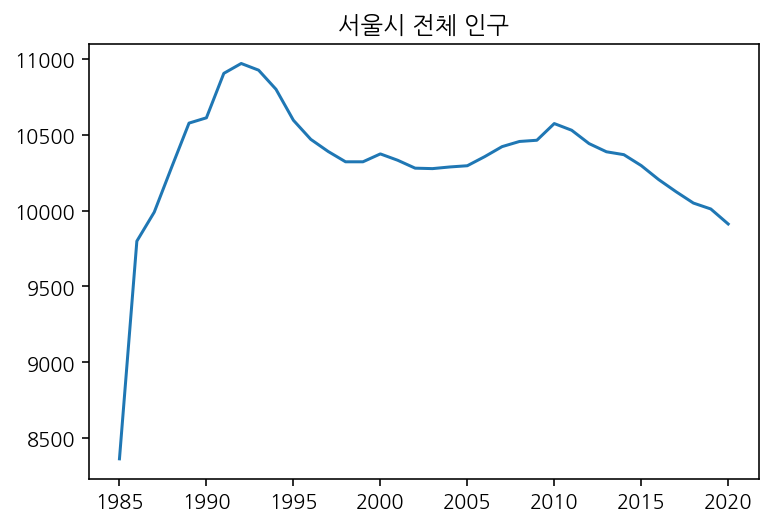

In [78]:
# plot = 선 / bar = 막대 / 

# 전체 인구 변화

# plt.title('서울시 인구 변화')
plt.title('서울시 전체 인구')
plt.plot(pop['year'],pop['total'])



**2) 남녀 인구 변화**

- 전체 남녀 인구 변화를 선 그래프로 시각화해 확인합니다.


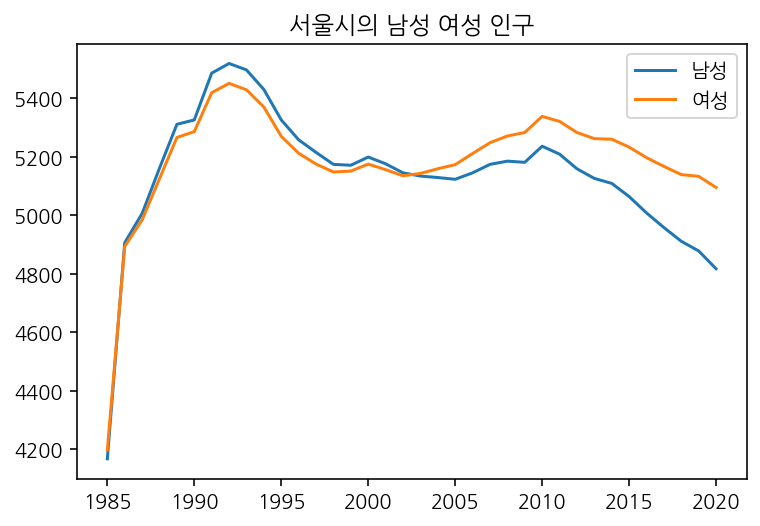

In [76]:
# 남녀 인구 변화
plt.title("서울시의 남녀 인구")
plt.plot(pop['year'],pop['male'],label='남성')
plt.plot(pop['year'],pop['female'],label='여성')
plt.legend()

**3) 한국인 인구 변화**

- 한국인 인구 변화를 선 그래프로 시각화해 확인합니다.

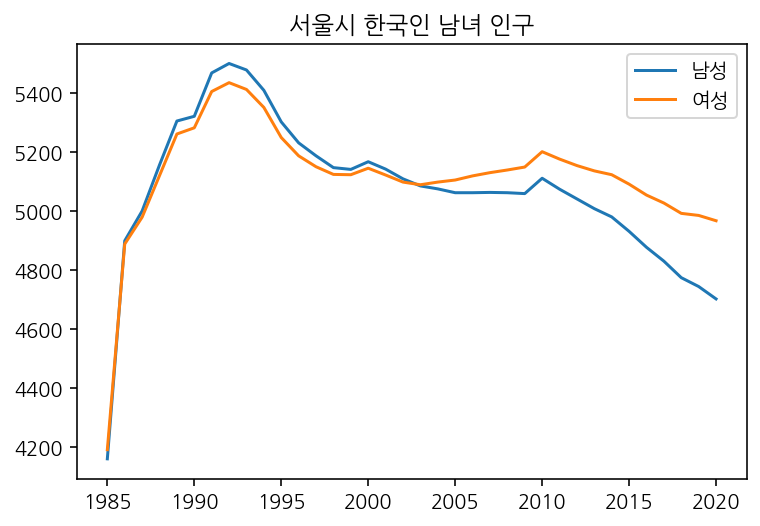

In [84]:
# 한국인 남녀 인구 변화
plt.title('서울시 한국인 남녀 인구')
plt.plot(pop['year'],pop['k_male'],label='남성')
plt.plot(pop['year'],pop['k_female'],label='여성')
plt.legend()


**4) (옵션) 외국인 인구 변화**

- 외국인 인구 변화를 선 그래프로 시각화해 확인합니다.

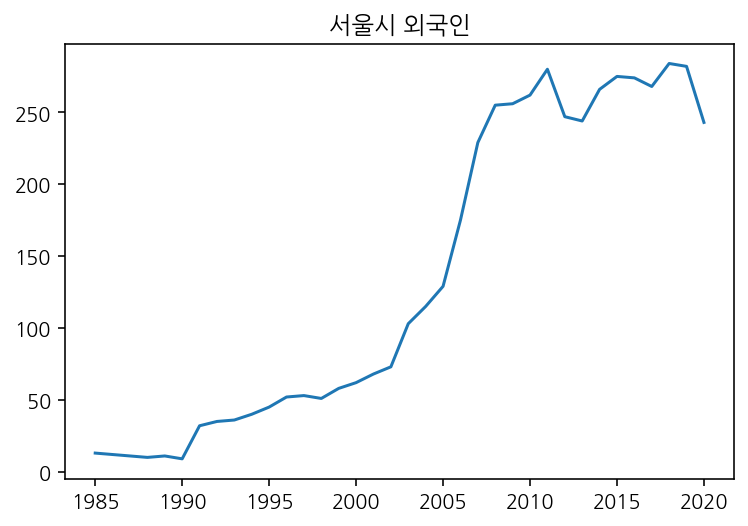

In [86]:
# 외국인 남녀 인구 변화
plt.title('서울시 외국인')
plt.plot(pop['year'],pop['f_male']+pop['f_female'])
# plt.plot(pop['year'],pop['f_female'])


**5) (옵션) 가구수 변화**

- 가구수 변화를 선 그래프로 시각화해 확인합니다.

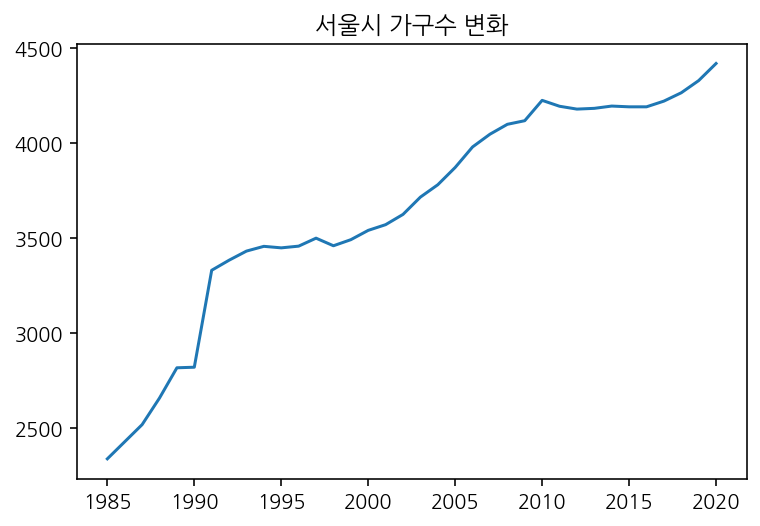

In [80]:
# 가구수 변화
plt.title('서울시 가구수 변화')
plt.plot(pop['year'],pop['household'])


**6) (옵션) 노령인구 변화**

- 노령인구 변화를 선 그래프로 시각화해 확인합니다.

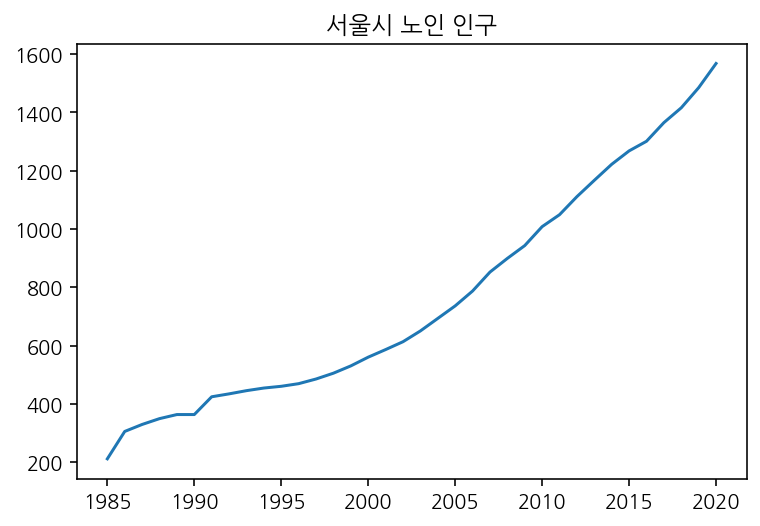

In [79]:
# 65세 이상 변화
plt.title('서울시 노인 인구')
plt.plot(pop['year'],pop['older_65'])


## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 인구수가 가장 많은 시기는 90년대이지만, 21세기에 접어들면서 인구수가 점차 감소중.
- 인구는 줄지만 노령인구는 늘어나 역삼각형 인구 구조를 갖고 있음.
- 90년대 이후 외국인이 점차 늘어났고 10년에 최고점을 찍었음.
- 인구수는 감소중인데 가구수는 증가중에 따라 1인 가구 비중이 늘어나고있음.
- 과거엔 남성 인구가 많았지만 최근엔 여성의 인구가 더 많아졌음.

**2) 기타**

- 그래프 그리기 관련 메소드를 배울 수 있었던 좋은 시간이였다.
- 다른 에이블러와의 의견 교류를 통해 막혔던 부분을 쉽게 해결했다.
- 
- 
- 